<a href="https://colab.research.google.com/github/Wilanth/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [ ]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [ ]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/Data_BSC_DPDM23/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [ ]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [ ]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0}) # แทนค่า แก้ค่าที่เป็นตัวหนังสือ

In [ ]:
credit = credit[['a9','a10','a12','a13','a16']] # เลือกเอาเฉพาะข้อมูลที่ไม่ได้เป็น continuous

In [ ]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


## Divide Data into Train and Test

In [ ]:
np.random.seed(seed=1)

In [ ]:
a = np.random.randint(2, size=len(credit))

In [ ]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
train = credit[a == 1]
train.shape

(324, 5)

In [ ]:
train

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
4,1,0,0,3,1
5,1,0,1,1,1
6,1,0,1,1,1
...,...,...,...,...,...
676,0,1,1,1,0
677,0,1,0,1,0
678,0,0,0,1,0
680,0,0,0,1,0


In [ ]:
test = credit[a == 0]
test.shape

(366, 5)

In [ ]:
test

,a9,a10,a12,a13,a16
2,1,0,0,1,1
3,1,1,1,1,1
9,1,0,1,1,1
10,0,0,1,1,1
12,1,0,1,1,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


## Start Decision Tree

### Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [ ]:
Dtree1 = DecisionTreeClassifier(random_state=0) # กำหนดให้ต้นไม้ของเราว่าจะโตไปยังไง # random ให้ได้เลขเดียวกัน

### Train

In [ ]:
x_train = train.iloc[:,:-1]

In [ ]:
y_train = train.iloc[:,-1]

In [ ]:
Dtree1.fit(x_train,y_train) # '.fit()' code to training

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn import tree

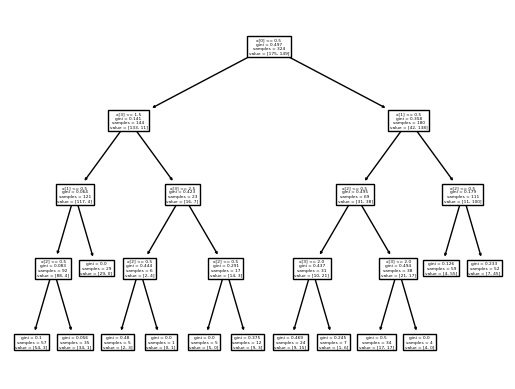

In [ ]:
tree.plot_tree(Dtree1);

### Test

In [ ]:
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
# เอา data test มาแแบ่งเป็น x และ y เหมือนเดิม

In [ ]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [ ]:
y_predict = Dtree1.predict(x_test) # ใส่แค่ x เพราะตอน test เราไม่รู้ว่าจริงๆแล้ว y คืออะไร
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predict)

0.8387978142076503

## Set parameter

### Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [ ]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=3)
# Define เป็นขั้นตอนที่ทำให้ทราบว่าต้นไม้ของแต่ละคนไม่เหมือนกัน
# max_depth คือ จำนวนชั้นของต้นไม้

### Train

In [ ]:
Dtree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

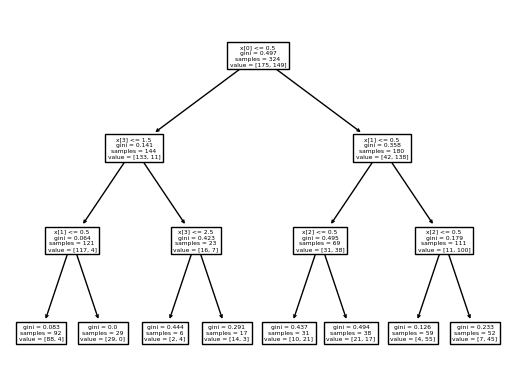

In [ ]:
tree.plot_tree(Dtree2);

### Test

In [ ]:
y_predict2 = Dtree2.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predict2)

0.8387978142076503

# HW3
ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 1 criterion, max_leaf_nodes
- แถว 2 splitter, min_samples_split
- แถว 3 min_samples_leaf, max_features
- แถว 4 min_impurity_decrease
- แถว 5 min_weight_fraction_leaf

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## แถว 2 splitter, min_samples_split

### min_samples_split

In [ ]:
DtreeHW3_1 = DecisionTreeClassifier(random_state=0,criterion='entropy',min_samples_split=323)

In [ ]:
DtreeHW3_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=323,
                       random_state=0)

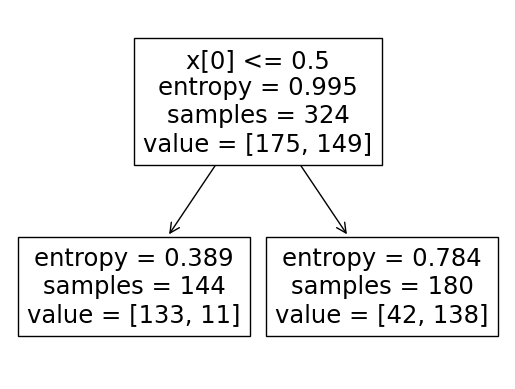

In [ ]:
tree.plot_tree(DtreeHW3_1);

In [ ]:
y_predictHW3_1 = DtreeHW3_1.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predictHW3_1)

0.8715846994535519

### splitter

เป็น Parameters ที่ใช้ในการเลือกการแยกในแต่ละโหนด กำหนดค่าให้เป็น "best" ในการเลือกการแยกหรือค่าที่ดีที่สุด และกำหนดให้เป็น "random" เพื่อเลือกการแยกแบบสุ่มที่ดีที่สุด

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
DtreeHWx = DecisionTreeClassifier(random_state=0,max_depth=4)

In [ ]:
DtreeHWx.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

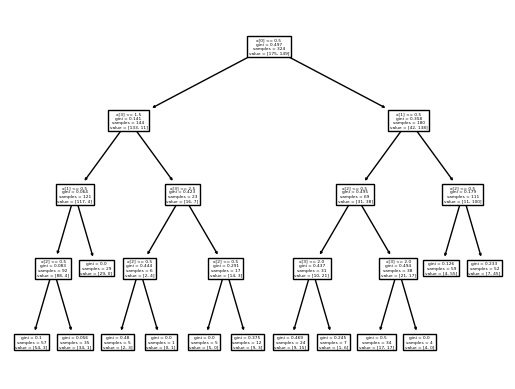

In [ ]:
tree.plot_tree(DtreeHWx);

In [ ]:
DtreeHW3_2 = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter="random")

In [ ]:
DtreeHW3_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random')

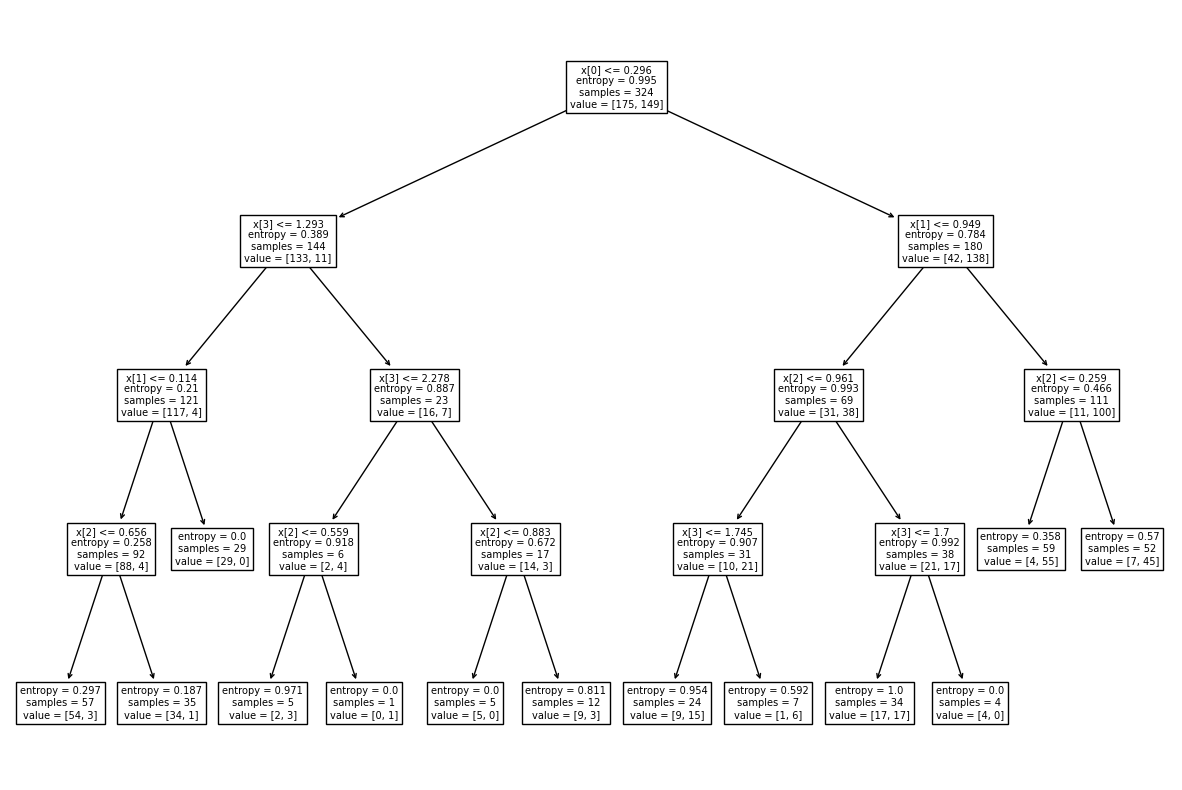

In [ ]:
_,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(DtreeHW3_2);

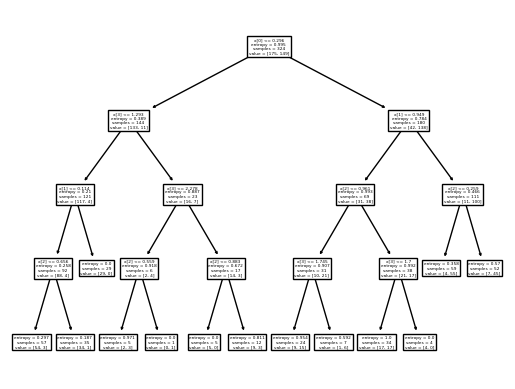

In [ ]:
tree.plot_tree(DtreeHW3_2);

In [ ]:
y_predictHW3_2 = DtreeHW3_2.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predictHW3_2)

0.8387978142076503

In [ ]:
DtreeHW3_2.tree_.feature

array([ 0,  3,  1,  2, -2, -2, -2,  3,  2, -2, -2,  2, -2, -2,  1,  2,  3,
       -2, -2,  3, -2, -2,  2, -2, -2], dtype=int64)

In [ ]:
DtreeHW3_2.tree_.threshold

array([ 0.29560869,  1.29277795,  0.11365515,  0.65564802, -2.        ,
       -2.        , -2.        ,  2.27779421,  0.55930421, -2.        ,
       -2.        ,  0.88291873, -2.        , -2.        ,  0.94916224,
        0.96135192,  1.74456782, -2.        , -2.        ,  1.69994826,
       -2.        , -2.        ,  0.25938788, -2.        , -2.        ])

#### compare

In [ ]:
DtreeHW3_3 = DecisionTreeClassifier(random_state=0,max_depth=2,splitter="best")

In [ ]:
DtreeHW3_3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

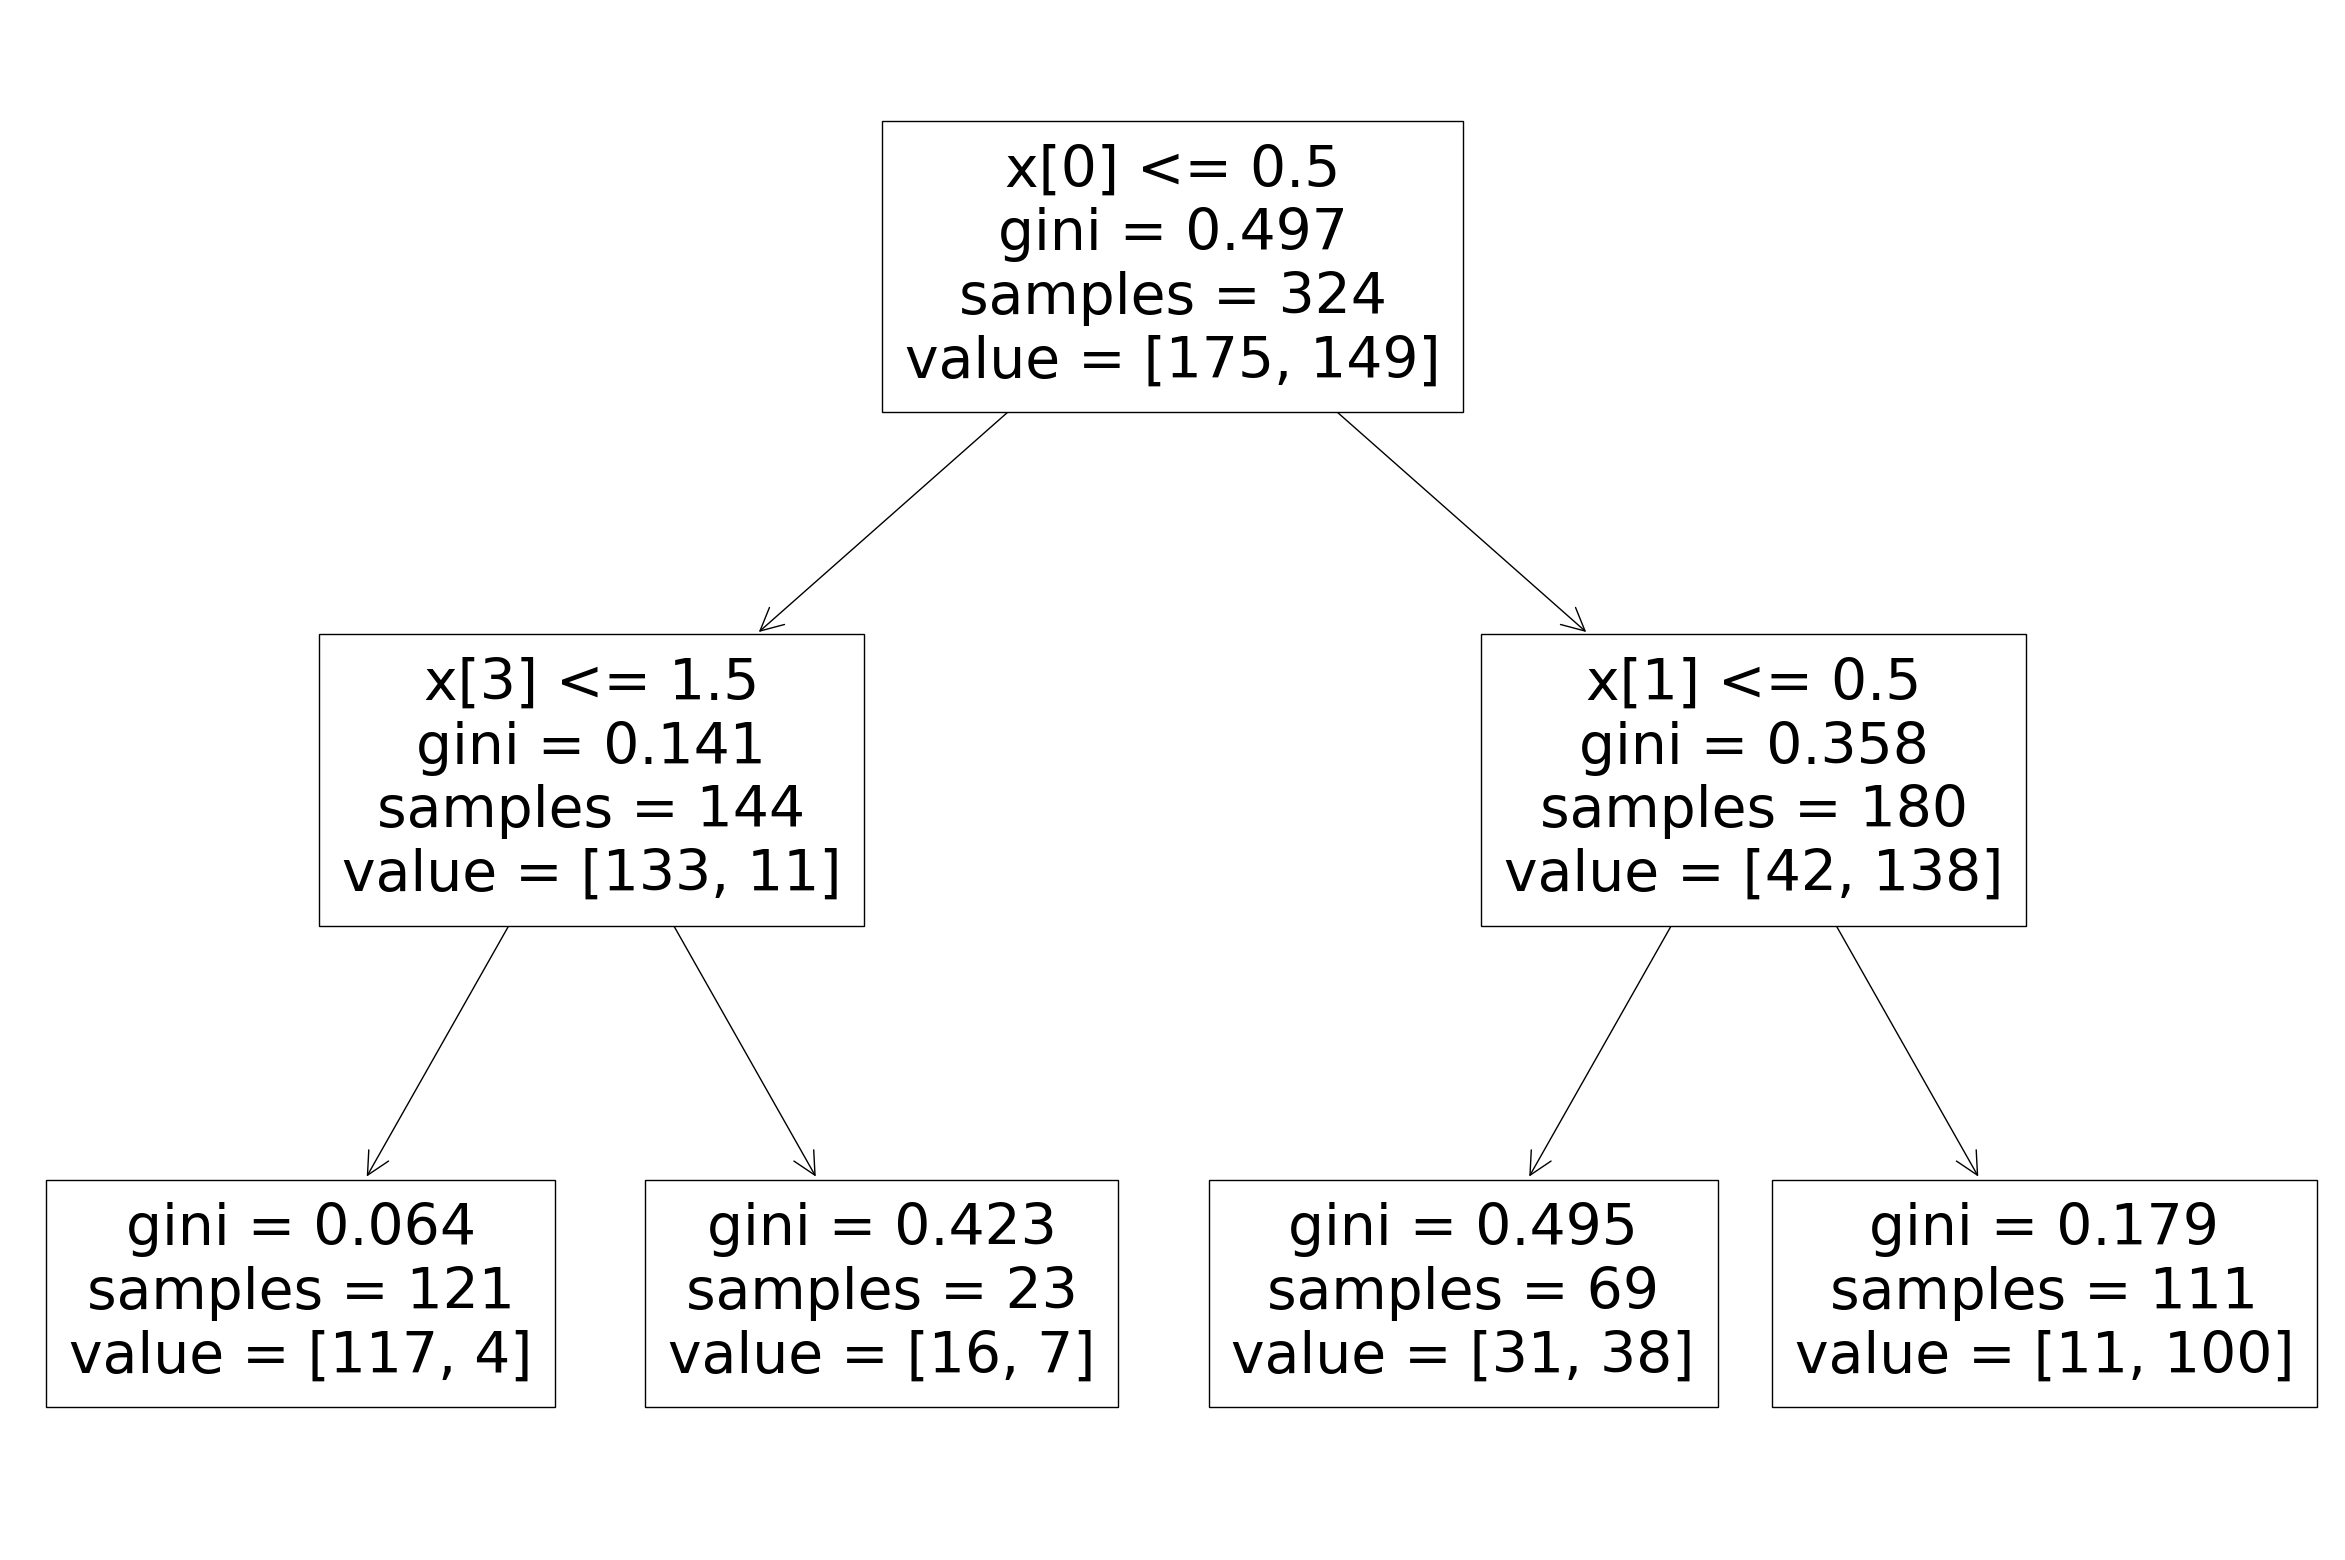

In [ ]:
_,ax = plt.subplots(figsize=(30,20))
tree.plot_tree(DtreeHW3_3);

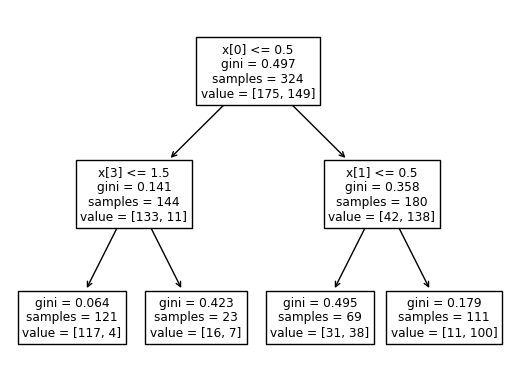

In [ ]:
tree.plot_tree(DtreeHW3_3);

In [ ]:
y_predictHW3_3 = DtreeHW3_3.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predictHW3_3)

0.8715846994535519

# Training Framework

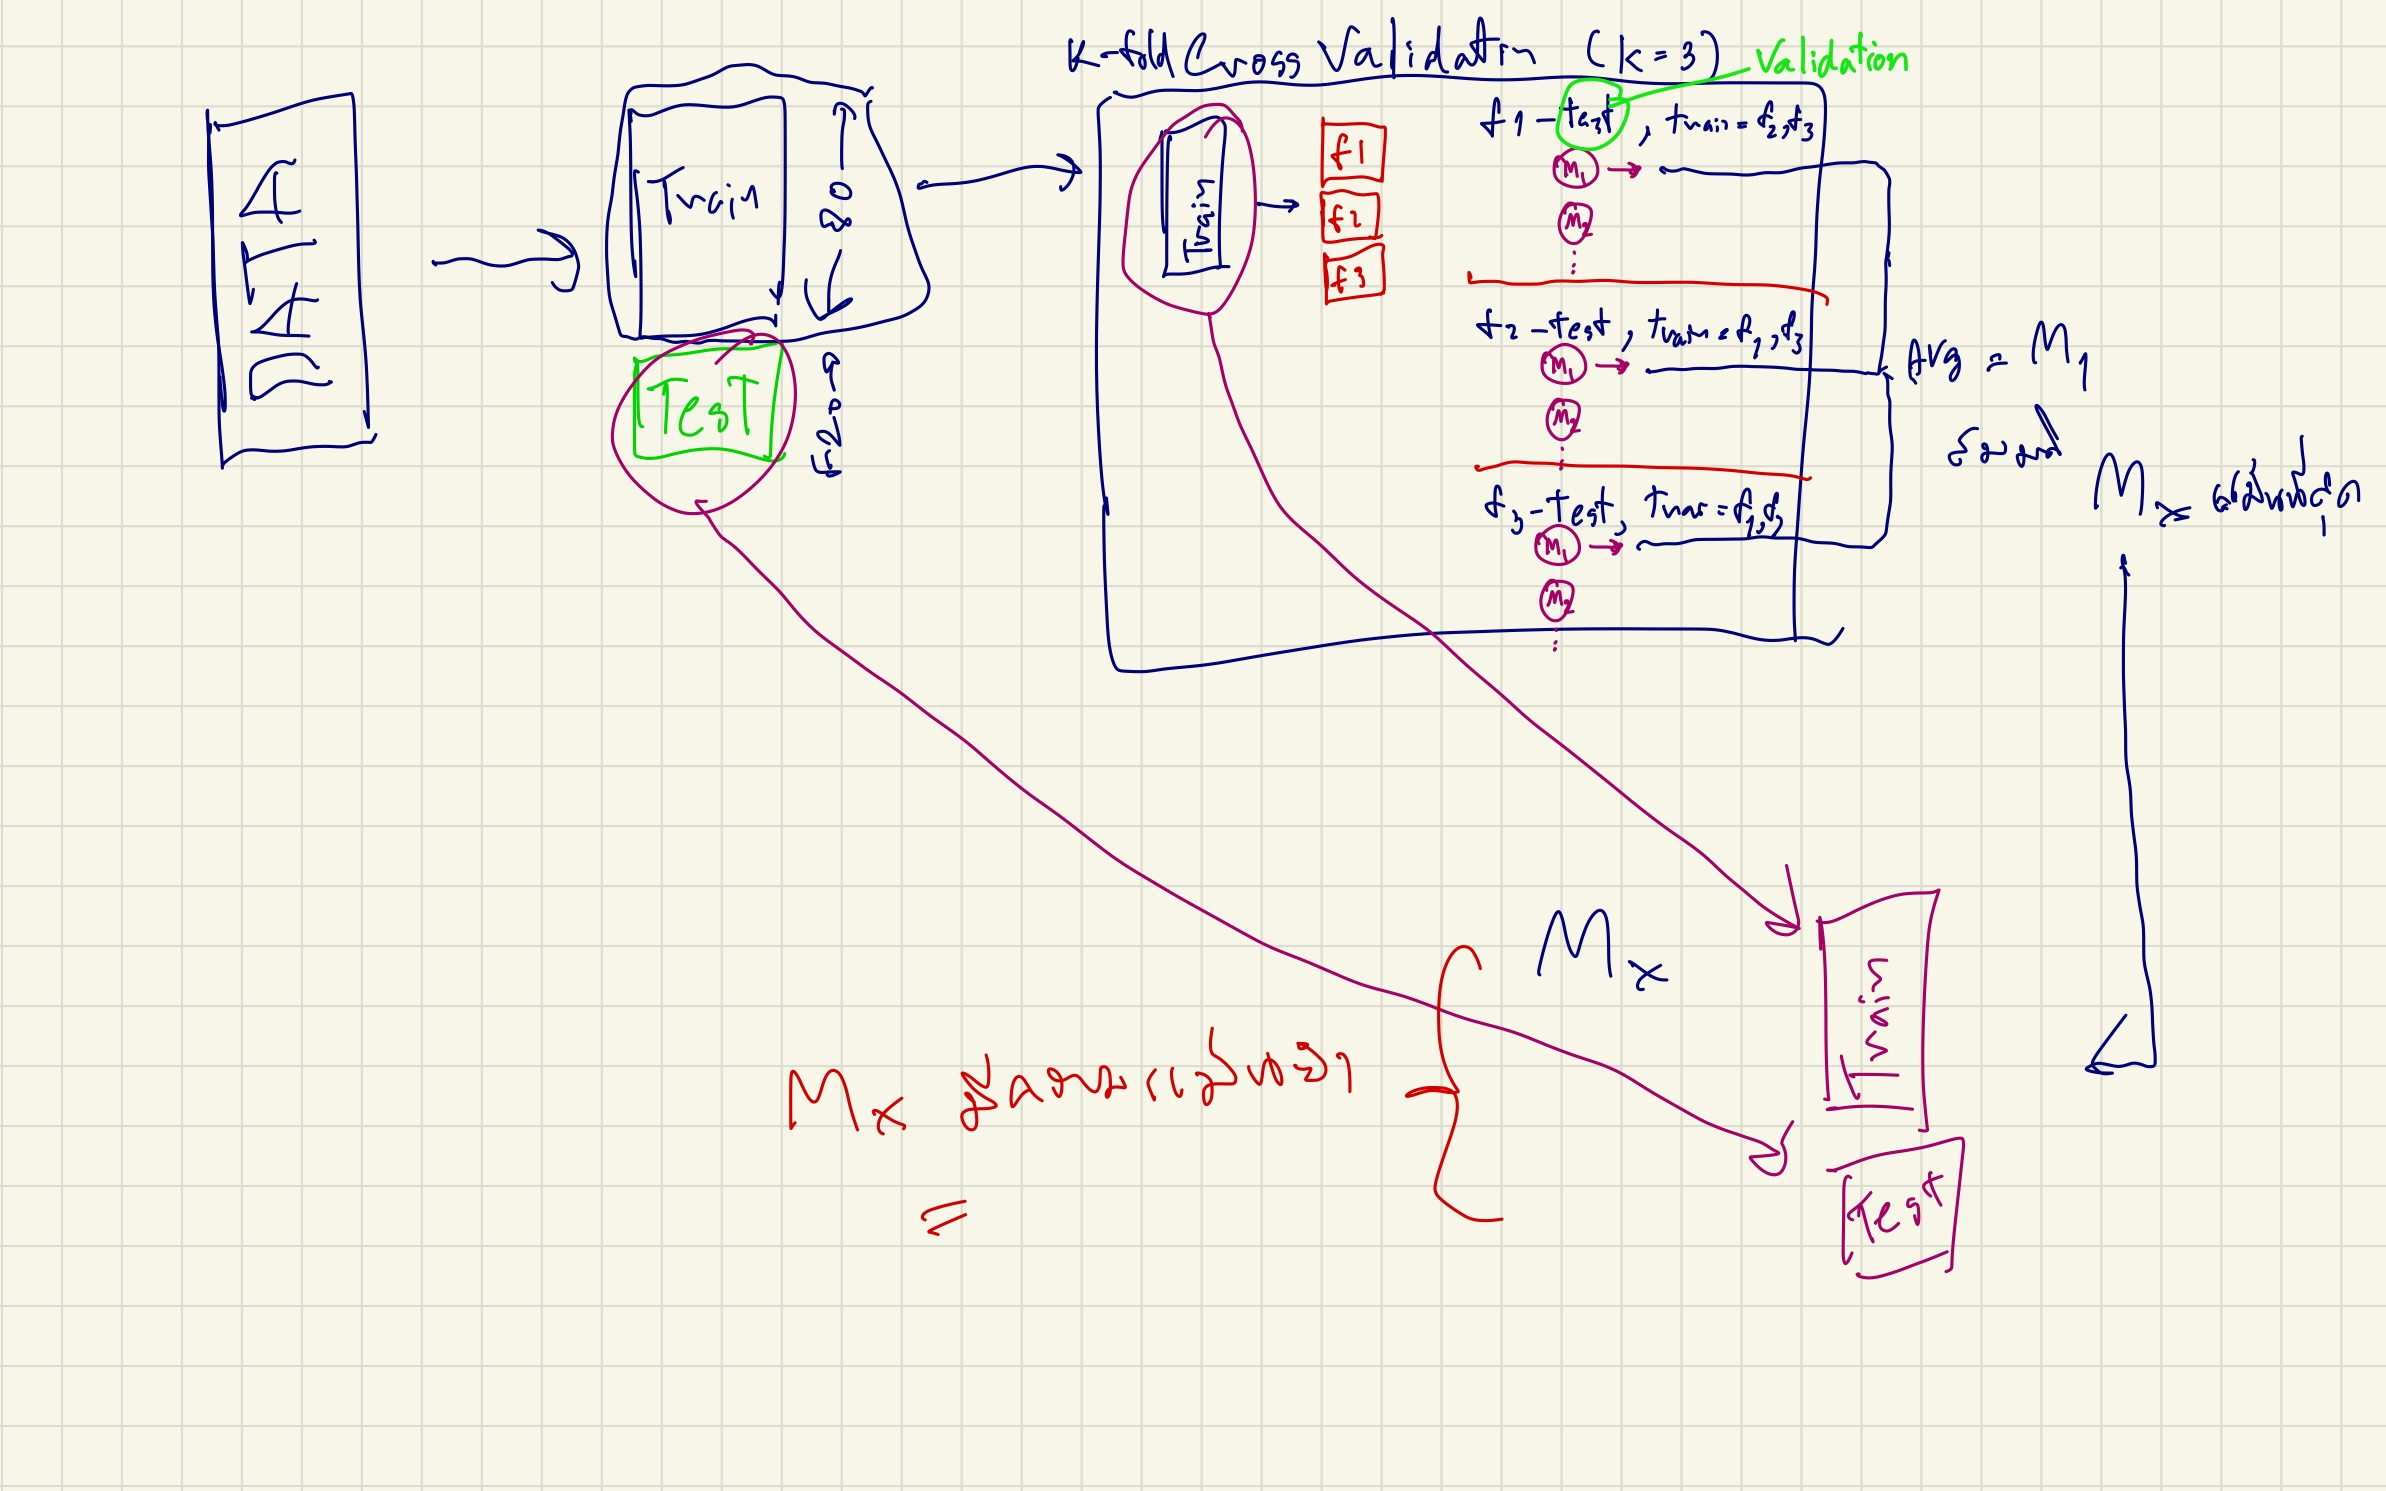

## Model Selection
เลือกโมเดลที่ดีที่สุด โดยเลือกต้นไม้จาก Parameters: depth, criterion และ Naiive Bayes จากนั้นรายงานผลคาดการณ์สำหรับนำไปทำนายในอนาคต

In [ ]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit = credit.iloc[:,:-1]
y_credit = credit.iloc[:,-1]

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_credit, y_credit, test_size=0.33, random_state=6)

### Split data into 3 folds

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=6)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
...     print(f"Fold {i}:")
...     print(f"  Train: index={train_index}")
...     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   5   6   7   8   9  11  14  15  18  20  21  22  23  24
  25  26  29  31  33  34  35  36  37  38  39  40  41  42  43  45  47  49
  50  51  52  55  57  58  60  62  63  64  65  67  68  70  73  74  75  76
  77  78  80  82  83  84  85  86  87  88  89  91  92  94  96  97  99 100
 101 102 104 105 106 107 108 110 111 114 118 119 120 121 123 124 125 126
 127 129 130 131 132 133 135 136 139 141 142 144 145 146 147 149 150 151
 152 153 157 159 160 161 164 165 167 168 169 170 172 173 174 176 178 180
 181 184 185 186 187 190 191 193 194 195 196 197 198 201 202 204 206 208
 211 213 214 216 218 219 220 225 226 227 228 233 234 235 236 237 238 240
 241 242 243 245 246 250 251 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 270 271 272 274 276 278 279 281 284 286 287 289 290 291
 295 296 298 300 301 302 303 304 306 309 313 314 316 317 318 319 321 322
 323 324 325 326 328 331 332 333 334 335 336 337 338 339 340 341 342 346
 347 350 353 355 358 361 362

### Train 4 decision tree models and 1 Naiive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
  result_f = {}
  #DT depth 3, cri gini
  Dtree1 = DecisionTreeClassifier(random_state=6, max_depth=3, criterion='gini') #define
  Dtree1.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
  prediction1 = Dtree1.predict(np.array(X_train)[test_index]) #predict
  acc1 = accuracy_score(np.array(y_train)[test_index], prediction1) #evaluate
  result_f['dt1'] = acc1

  #DT depth 5, cri gini
  Dtree2 = DecisionTreeClassifier(random_state=6, max_depth=5, criterion='gini')
  Dtree2.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
  prediction2 = Dtree2.predict(np.array(X_train)[test_index]) #predict
  acc2 = accuracy_score(np.array(y_train)[test_index], prediction2) #evaluate
  result_f['dt2'] = acc2

  #DT depth 3, cri gain
  Dtree3 = DecisionTreeClassifier(random_state=6, max_depth=3, criterion='entropy')
  Dtree3.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
  prediction3 = Dtree3.predict(np.array(X_train)[test_index]) #predict
  acc3 = accuracy_score(np.array(y_train)[test_index], prediction3) #evaluate
  result_f['dt3'] = acc3

  #DT depth 5, cri gain
  Dtree4 = DecisionTreeClassifier(random_state=6, max_depth=3, criterion='entropy')
  Dtree4.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
  prediction4 = Dtree4.predict(np.array(X_train)[test_index]) #predict
  acc4 = accuracy_score(np.array(y_train)[test_index], prediction4) #evaluate
  result_f['dt4'] = acc4

  #Naiive Bayes
  gnb = GaussianNB()
  gnb.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
  predictionNB = gnb.predict(np.array(X_train)[test_index]) #predict
  accNB = accuracy_score(np.array(y_train)[test_index], predictionNB) #evaluate
  result_f['NB'] = accNB

  results.append(result_f)

In [ ]:
results

[{'dt1': 0.8246753246753247,
  'dt2': 0.8246753246753247,
  'dt3': 0.8246753246753247,
  'dt4': 0.8246753246753247,
  'NB': 0.8831168831168831},
 {'dt1': 0.8311688311688312,
  'dt2': 0.8311688311688312,
  'dt3': 0.8311688311688312,
  'dt4': 0.8311688311688312,
  'NB': 0.8311688311688312},
 {'dt1': 0.8246753246753247,
  'dt2': 0.8051948051948052,
  'dt3': 0.8246753246753247,
  'dt4': 0.8246753246753247,
  'NB': 0.8441558441558441}]

### Find the best model from 3-fold cross validation

In [ ]:
print(f"averaged acc DT1 = {(results[0]['dt1']+results[1]['dt1']+results[2]['dt1'])/3}")
print(f"averaged acc DT2 = {(results[0]['dt2']+results[1]['dt2']+results[2]['dt2'])/3}")
print(f"averaged acc DT3 = {(results[0]['dt3']+results[1]['dt3']+results[2]['dt3'])/3}")
print(f"averaged acc DT4 = {(results[0]['dt4']+results[1]['dt4']+results[2]['dt4'])/3}")
print(f"averaged acc NB = {(results[0]['NB']+results[1]['NB']+results[2]['NB'])/3}")

averaged acc DT1 = 0.8268398268398268
averaged acc DT2 = 0.8203463203463204
averaged acc DT3 = 0.8268398268398268
averaged acc DT4 = 0.8268398268398268
averaged acc NB = 0.8528138528138528


### Evaluate on test

In [ ]:
gnb = GaussianNB() #define
gnb.fit(np.array(X_train)[train_index],np.array(y_train)[train_index]) #train
prediction_test = gnb.predict(np.array(x_test)) #predict
acc_test = accuracy_score(np.array(y_test), prediction_test) #evaluate

print(f"model Naiive Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ {acc_test}")

model Naiive Bayes จะมี Accuracy เมื่อไปใช้งานจริงประมาณ 0.8421052631578947
